# Pointing Experiment

## Testdesign

In our study we wanted to conduct an pointing experiment

### Participants

Due to limited ressources, the study was only conducted by two male participants with good computer knowledge.
The small number of participants should be consider in the results. 

### Setup

### Variables

Independent variables: 
    - Order of the tests
    - Use of novel technique (on/off)
    
Dependent variables: 
    - reaction time 
    - errors. 
    
Controlled variables: pointing device (mouse), screen resolution, screen size, screen position, environment.

## Package import

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sb

## Import data via csv

In [2]:
#import csv data
headerlist= ["user_id", "current_size", "max_size", "use_novel_technique",
                    "elapsed_repetitions", "target", "click_offset", "distance", "time",
                    "errors", "timestamp"]

df_data = pd.read_csv('result.csv', names= headerlist)
df_data

,user_id,current_size,max_size,use_novel_technique,elapsed_repetitions,target,click_offset,distance,time,errors,timestamp
0,1,"[10, 5]",1000,True,1,"(900.0, 500.0, 75.0)","(0.0, 0.0)",0,735,0,2021-05-12T14:47:01
1,1,"[10, 5]",1000,True,2,"(700.0, 900.0, 75.0)","(0.0, 0.0)",0,862,0,2021-05-12T14:47:02
2,1,"[10, 5]",1000,True,3,"(700.0, 100.0, 75.0)","(0.0, 0.0)",0,849,0,2021-05-12T14:47:03
3,1,"[10, 5]",1000,True,4,"(900.0, 300.0, 75.0)","(0.0, 0.0)",0,792,0,2021-05-12T14:47:04
4,1,"[10, 5]",1000,True,5,"(700.0, 900.0, 75.0)","(0.0, 0.0)",0,781,0,2021-05-12T14:47:05
...,...,...,...,...,...,...,...,...,...,...,...
235,4,"[10, 5]",1000,True,6,"(1900.0, 300.0, 75.0)","(0.0, 0.0)",0,1322,0,2021-05-12T16:26:29
236,4,"[10, 5]",1000,True,7,"(1100.0, 100.0, 75.0)","(0.0, 0.0)",0,1193,0,2021-05-12T16:26:31
237,4,"[10, 5]",1000,True,8,"(300.0, 700.0, 75.0)","(0.0, 0.0)",0,957,0,2021-05-12T16:26:32
238,4,"[10, 5]",1000,True,9,"(900.0, 100.0, 75.0)","(0.0, 0.0)",0,783,0,2021-05-12T16:26:32


In [3]:
#group data per condition
df_cond_1 = df_data[df_data['current_size'] == '[10, 5]']
df_cond_2 = df_data[df_data['current_size'] == '[20, 10]']
df_cond_3 = df_data[df_data['current_size'] == '[8, 4]']

In [4]:
#group data if novel pointing technique is used or not
df_novel_true = df_data[df_data['use_novel_technique'] == True]
df_novel_false = df_data[df_data['use_novel_technique'] == False]

## Evaluation

### Completion time per condition without novel technique

In [5]:
cond1_novel_false = df_cond_1['time'][df_cond_1['use_novel_technique'] == False]
cond2_novel_false = df_cond_2['time'][df_cond_2['use_novel_technique'] == False]
cond3_novel_false = df_cond_3['time'][df_cond_3['use_novel_technique'] == False]

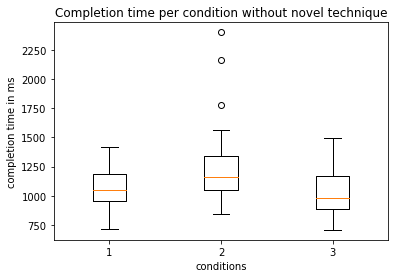

In [6]:
# boxplot
plt.boxplot([cond1_novel_false, cond2_novel_false, cond3_novel_false])
plt.title('Completion time per condition without novel technique')
plt.xlabel('conditions')
plt.ylabel('completion time in ms')
plt.savefig('time_per_cond_without_novel_technique.pdf')

### Completion time per condition and user without novel technique

In [7]:
cond_user1_novel_false = df_novel_false['current_size'][df_novel_false['user_id'] == 1]
cond_user1_time_novel_false = df_novel_false['time'][df_novel_false['user_id'] == 1]
cond_user2_novel_false = df_novel_false['current_size'][df_novel_false['user_id'] == 2]
cond_user2_time_novel_false= df_novel_false['time'][df_novel_false['user_id'] == 2]
cond_user3_novel_false = df_novel_false['current_size'][df_novel_false['user_id'] == 3]
cond_user3_time_novel_false = df_novel_false['time'][df_novel_false['user_id'] == 3]
cond_user4_novel_false = df_novel_false['current_size'][df_novel_false['user_id'] == 4]
cond_user4_time_novel_false = df_novel_false['time'][df_novel_false['user_id'] == 4]

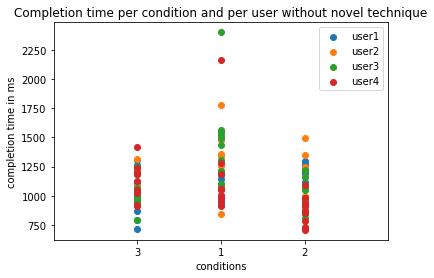

In [36]:
plt.scatter(cond_user1_novel_false, cond_user1_time_novel_false, label='user1')
plt.scatter(cond_user2_novel_false, cond_user2_time_novel_false, label='user2')
plt.scatter(cond_user3_novel_false, cond_user3_time_novel_false, label='user3')
plt.scatter(cond_user4_novel_false, cond_user4_time_novel_false, label='user4')
plt.legend(loc=1)
plt.title('Completion time per condition and per user without novel technique')
plt.xlabel('conditions')
plt.ylabel('completion time in ms')
plt.xticks(["[20, 10]", "[8, 4]", "[10, 5]"], [1, 2, 3])
plt.xlim(-1, 3)
plt.savefig('time_per_cond_and_user_without_improv.pdf')

### Errors per condition without improvement

In [30]:
cond1_err_false = df_novel_false['errors'][df_novel_false['current_size'] == "[20, 10]"][df_novel_false['errors'] == 0].count() 
cond1_err_true = df_novel_false['errors'][df_novel_false['current_size'] == "[20, 10]"][df_novel_false['errors'] == 1].count()
cond2_err_false = df_novel_false['errors'][df_novel_false['current_size'] == "[8, 4]"][df_novel_false['errors'] == 0].count()
cond2_err_true = df_novel_false['errors'][df_novel_false['current_size'] == "[8, 4]"][df_novel_false['errors'] == 1].count()
cond3_err_false = df_novel_false['errors'][df_novel_false['current_size'] =="[10, 5]"][df_novel_false['errors'] == 0].count()
cond3_err_true = df_novel_false['errors'][df_novel_false['current_size'] == "[10, 5]"][df_novel_false['errors'] == 1].count()

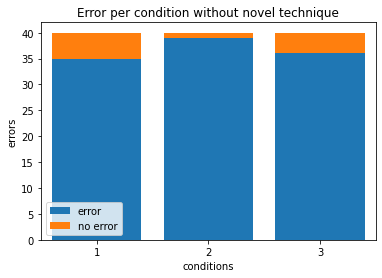

In [35]:
err_cond=[1,2,3]
plt.bar(err_cond, (cond1_err_false, cond2_err_false, cond3_err_false), label='error')
plt.bar(err_cond, (cond1_err_true, cond2_err_true , cond3_err_true), bottom=(cond1_err_false, cond2_err_false, cond3_err_false), label='no error')
plt.title('Error per condition without novel technique')
plt.xlabel('conditions')
plt.ylabel('errors')
plt.legend()
plt.xticks([1, 2, 3], [1, 2, 3])
plt.xlim(0.5, 3.5)
plt.savefig('error_per_cond_without_novel.pdf')

In [43]:
cond_novel_false = df_novel_false['current_size']
cond_time_novel_false = df_novel_false['time']
cond_novel_true = df_novel_true['current_size']
cond_time_novel_true = df_novel_true['time']
cond_time_novel_true

0       735
1       862
2       849
3       792
4       781
       ... 
235    1322
236    1193
237     957
238     783
239     889
Name: time, Length: 120, dtype: int64

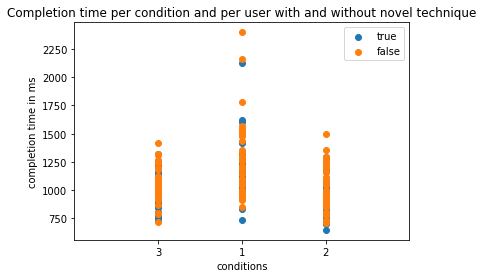

In [46]:
plt.scatter(cond_novel_true, cond_time_novel_true, label='true')
plt.scatter(cond_novel_false, cond_time_novel_false, label='false')
plt.legend(loc=1)
plt.title('Completion time per condition and per user with and without novel technique')
plt.xlabel('conditions')
plt.ylabel('completion time in ms')
plt.xticks(["[20, 10]", "[8, 4]", "[10, 5]"], [1, 2, 3])
plt.xlim(-1, 3)
plt.savefig('time_per_cond_and_user_with_or_without_novel.pdf')